In [16]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

minst=tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test)=minst.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [20]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [34]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9826 - loss: 0.0536
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9872 - loss: 0.0370
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9911 - loss: 0.0285
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9915 - loss: 0.0239
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9937 - loss: 0.0182
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9941 - loss: 0.0170
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9950 - loss: 0.0138
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9962 - loss: 0.0111
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9963 - loss: 0.0102
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9980 - loss: 0.0068


In [35]:
model.save('my_handwritten.keras')

In [36]:
loss,accuracy=model.evaluate(x_test,y_test)
print(loss)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9641 - loss: 0.1974
0.1566435992717743
0.9690999984741211


In [37]:
import cv2
image = cv2.resize(image[0], (28, 28))  # Resize to 28x28
image = image.reshape(1, 28, 28) #Add batch dimension


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
This image is a:	2


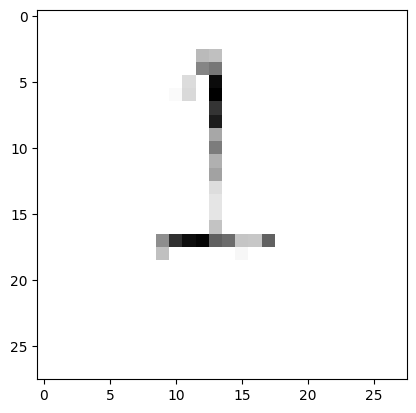

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
This image is a:	2


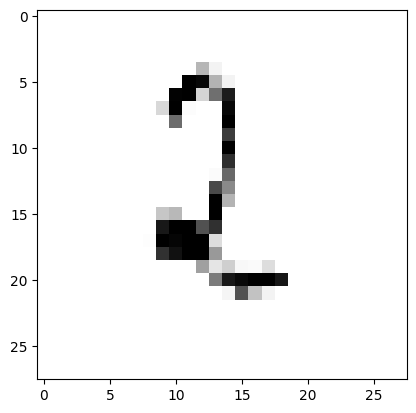

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
This image is a:	3


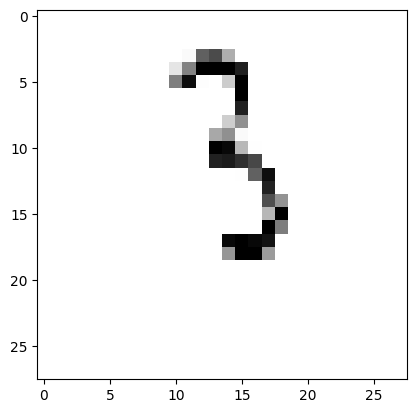

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
This image is a:	4


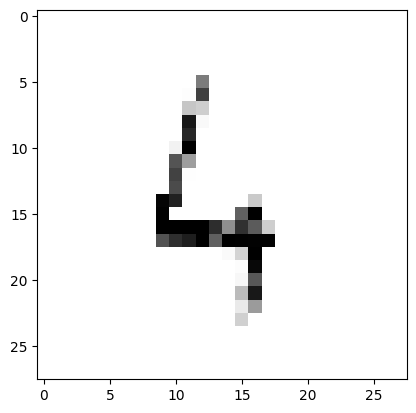

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
This image is a:	3


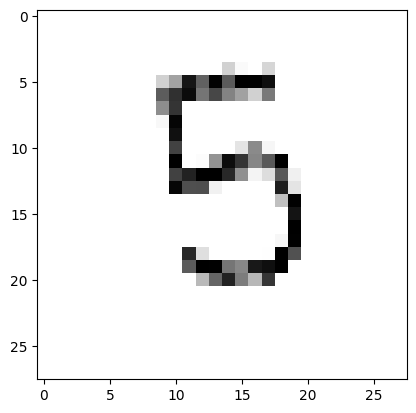

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
This image is a:	2


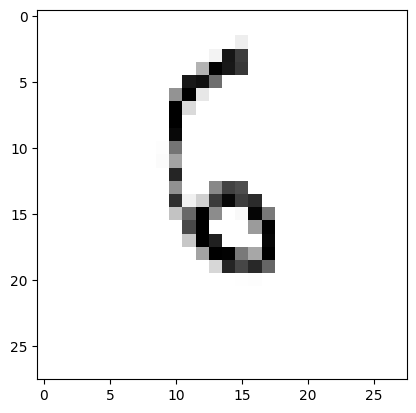

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
This image is a:	7


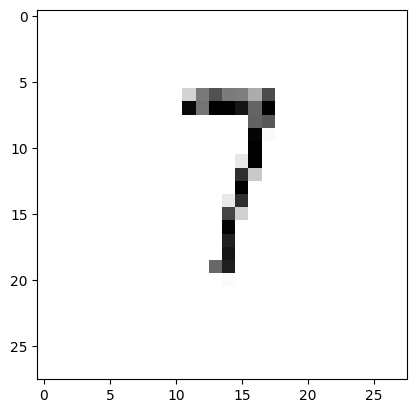

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
This image is a:	7


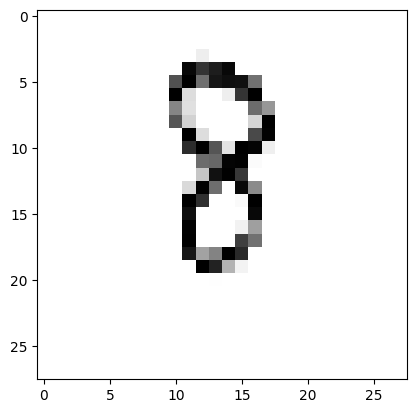

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
This image is a:	3


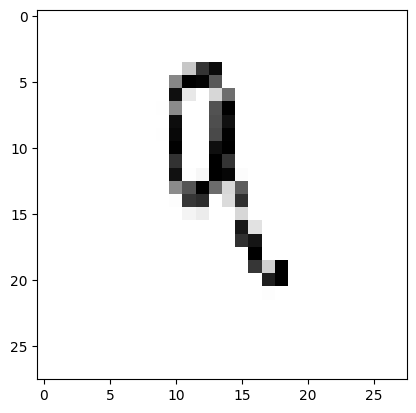

In [39]:
model=tf.keras.models.load_model('my_handwritten.keras')
image_number=1
while os.path.isfile(f"/content/numbers/image_{image_number}.png"):
  try:
    image=cv2.imread(f"/content/numbers/image_{image_number}.png")[:,:,0]
    image=np.invert(np.array([image]))
    # Resize image to 28x28 pixels
    image = cv2.resize(image[0], (28, 28)) #Reshape the image to match the expected input shape (28, 28)
    image = image.reshape(1, 28, 28) # Add a batch dimension

    prediction=model.predict(image)
    print(f"This image is a:\t{np.argmax(prediction)}")
    plt.imshow(image[0],cmap=plt.cm.binary)
    plt.show()
  finally:
    image_number+=1